In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:

# Parameter election
ngram_range = (1,2)
min_df = 10    #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
max_df = 1.   #max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
max_features = 1000
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
file_train = 'training.csv'
file_test = 'test.csv'
df_train = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)
train_text = df_train['article_words']
test_text = df_test['article_words']
X_train = tfidf.fit_transform(train_text).toarray()
X_test = tfidf.transform(test_text).toarray()

y_train = df_train['topic'].to_list()
y_test = df_test['topic'].to_list()

y = y_test + y_train
topic_dict = dict.fromkeys(y)
topic_dict.update((k,i) for i,k in enumerate(topic_dict))


## Dimensionality deduction

In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
features = np.concatenate((X_train,X_test), axis=0)
labels = np.concatenate((y_train,y_test), axis=0)
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 
    elif (model == 'TruncatedSVD'):
        mod = TruncatedSVD(n_components=2)
        title = 'TruncatedSVD decomposition'
    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'IRRELEVANT',
        "1": 'FOREX MARKETS',
        "2": 'SPORTS',
        "3": 'MONEY MARKETS',
        "4": 'SHARE LISTINGS',
        "5": 'BIOGRAPHIES PERSONALITIES PEOPLE',
        "6": 'DEFENCE',
        "7": 'SCIENCE AND TECHNOLOGY',
        "8": 'HEALTH',
        "9": 'ARTS CULTURE ENTERTAINMENT',
        "10": 'DOMESTIC MARKETS'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen","black",
                             "darkred","gray","violet","aqua","brown"],
                    alpha=.7).set_title(title);



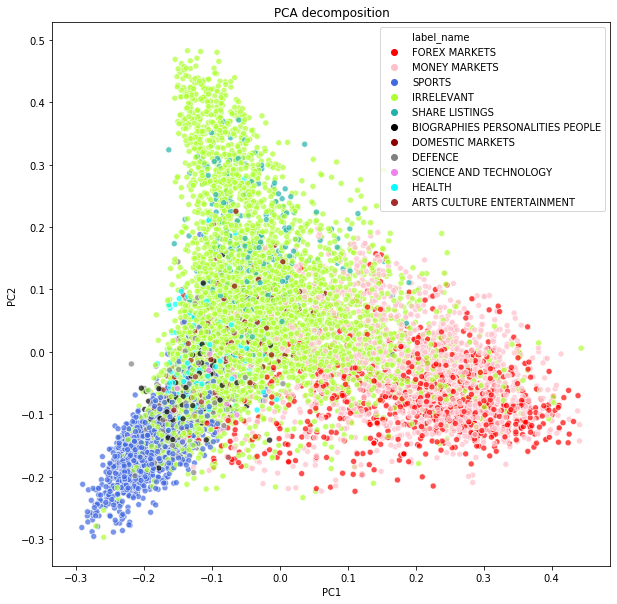

In [20]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

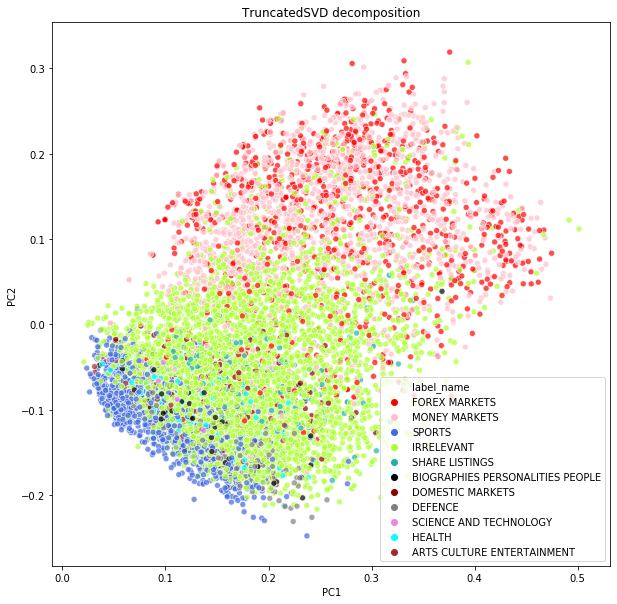

In [17]:
plot_dim_red("TruncatedSVD", 
             features=features, 
             labels=labels,
             n_components=2)

In [131]:
#np.array(y_train) == 
features_chi2 = chi2(X_train, np.array(y_train) == 0)
indices = np.argsort(features_chi2[0])
feature_names = np.array(tfidf.get_feature_names())[indices]
unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
unigrams

['unit',
 'brit',
 'begin',
 'peopl',
 'rise',
 'newsroom',
 'sign',
 'recent',
 'good',
 'term',
 'head',
 'demand',
 'sell',
 'posit',
 'chin',
 'compar',
 'off',
 'chang',
 'interest',
 'low',
 'high',
 'end',
 'fund',
 'half',
 'big',
 'early',
 'percent',
 'intern',
 'forc',
 'decid',
 'fell',
 'lead',
 'record',
 'offer',
 'city',
 'remain',
 'econom',
 'polic',
 'pct',
 'call',
 'support',
 'rose',
 'late',
 'prev',
 'new',
 'show',
 'nation',
 'make',
 'inflat',
 'americ',
 'major',
 'key',
 'add',
 'month',
 'secur',
 'south',
 'figur',
 'continu',
 'meet',
 'june',
 'emu',
 'put',
 'buy',
 'europ',
 'long',
 'fall',
 'suppl',
 'due',
 'public',
 'start',
 'numb',
 'futur',
 'countr',
 'local',
 'strong',
 'announc',
 'comment',
 'rais',
 'activ',
 'trad',
 'yen',
 'week',
 'contract',
 'told',
 'memb',
 'made',
 'move',
 'set',
 'european',
 'thursday',
 'part',
 'janu',
 'data',
 'july',
 'gain',
 'aver',
 'import',
 'tuesday',
 'german',
 'reut',
 'gold',
 'top',
 'cut',
 '

In [132]:
unigrams[-5:]

['compan', 'net', 'play', 'match', 'dollar']

In [4]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(topic_dict.items()):
    #print(Product,category_id)
    features_chi2 = chi2(X_train, np.array(y_train) == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-10:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'ARTS CULTURE ENTERTAINMENT' category:
  . Most correlated unigrams:
. live
. top
. man
. show
. night
. life
. releas
. child
. televis
. act
  . Most correlated bigrams:
. work work
. show show

# 'BIOGRAPHIES PERSONALITIES PEOPLE' category:
  . Most correlated unigrams:
. televis
. visit
. presid
. life
. suff
. man
. child
. yeltsin
. fami
. hospit
  . Most correlated bigrams:
. presid presid
. yeltsin yeltsin

# 'DEFENCE' category:
  . Most correlated unigrams:
. alli
. russia
. nuclear
. forc
. arm
. defend
. army
. troop
. milit
. nato
  . Most correlated bigrams:
. milit milit
. nato nato

# 'DOMESTIC MARKETS' category:
  . Most correlated unigrams:
. ban
. eu
. custom
. oil
. sugar
. chin
. export
. wheat
. ton
. import
  . Most correlated bigrams:
. ton ton
. import import

# 'FOREX MARKETS' category:
  . Most correlated unigrams:
. sterl
. forex
. exchang
. rate
. deal
. fix
. dlr
. mark
. currenc
. dollar
  . Most correlated bigrams:
. currenc currenc
. dollar dollar

# '

In [5]:
for Product, category_id in sorted(topic_dict.items()):
    #print(Product,category_id)
    features_chi2 = chi2(X_test, np.array(y_test) == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-10:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'ARTS CULTURE ENTERTAINMENT' category:
  . Most correlated unigrams:
. pound
. program
. insur
. win
. sunday
. won
. act
. child
. sery
. show
  . Most correlated bigrams:
. chang chang
. show show

# 'BIOGRAPHIES PERSONALITIES PEOPLE' category:
  . Most correlated unigrams:
. court
. return
. paul
. interview
. michael
. case
. fami
. child
. live
. clinton
  . Most correlated bigrams:
. capit capit
. presid presid

# 'DEFENCE' category:
  . Most correlated unigrams:
. west
. moscow
. alli
. peac
. arm
. milit
. defend
. troop
. army
. nato
  . Most correlated bigrams:
. defend defend
. nato nato

# 'DOMESTIC MARKETS' category:
  . Most correlated unigrams:
. heavy
. limit
. janu
. import
. car
. detail
. consum
. eas
. japan
. taiw
  . Most correlated bigrams:
. japan japan
. taiw taiw

# 'FOREX MARKETS' category:
  . Most correlated unigrams:
. mark
. bank
. thai
. rate
. crown
. fix
. baht
. currenc
. dlr
. dollar
  . Most correlated bigrams:
. fix fix
. dollar dollar

# 'HEALTH

In [12]:

rf = RFC(n_estimators=200, #the number of trees in the forest 9
         criterion='gini', #a way to decide the attribute
         max_depth=80, #max depth of the tree
         min_samples_split=9, #The minimum number of samples required to split an internal node
         min_samples_leaf=1, #The minimum number of samples required to be at a leaf node
         max_features='sqrt', #The number of features to consider when looking for the best split:
         max_leaf_nodes=None,
         bootstrap=False,
         warm_start=False) #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
rf.fit(X_train,y_train)
predicted_y = rf.predict(X_test)
predicted_y_train = rf.predict(X_train)
print(classification_report(y_test,predicted_y))
print(accuracy_score(y_test,predicted_y))
print("\n")
print(classification_report(y_train,predicted_y_train))
print(accuracy_score(y_train,predicted_y_train))


                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       0.00      0.00      0.00         3
BIOGRAPHIES PERSONALITIES PEOPLE       1.00      0.07      0.12        15
                         DEFENCE       0.88      0.54      0.67        13
                DOMESTIC MARKETS       0.50      0.50      0.50         2
                   FOREX MARKETS       0.60      0.31      0.41        48
                          HEALTH       0.83      0.36      0.50        14
                      IRRELEVANT       0.82      0.90      0.86       266
                   MONEY MARKETS       0.52      0.74      0.61        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.67      0.29      0.40         7
                          SPORTS       0.91      0.97      0.94        60

                        accuracy                           0.76       500
                       macro avg    

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Grid search

In [3]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6,7,8,9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# warm start
warm_start = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'warm_start':warm_start}
rf = RFC()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = 
                               random_grid, 
                               n_iter = 50, 
                               cv = 3, 
                               verbose=1, 
                               random_state=8, #42
                               n_jobs = -1)
                                


In [ ]:
rf_random.fit(X_train,y_train)

In [119]:
predicted_y = rf_random.predict(X_test)
predicted_y_train = rf_random.predict(X_train)
print(classification_report(y_test,predicted_y))
print("\n")
print(classification_report(y_train,predicted_y_train))
print(rf_random.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       266
           1       0.54      0.29      0.38        48
           2       0.87      0.97      0.91        60
           3       0.51      0.70      0.59        69
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00        15
           6       1.00      0.08      0.14        13
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         3
          10       0.50      0.50      0.50         2

    accuracy                           0.73       500
   macro avg       0.47      0.33      0.33       500
weighted avg       0.69      0.73      0.69       500



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4734
           1       0.95      0.94      0.95       845
           2       0.9

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


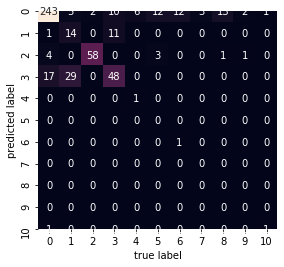

In [120]:
mat = confusion_matrix(y_test, predicted_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');